## Train a simple convnet on the Fashion MNIST dataset with Data Augmentation

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from comet_ml import Experiment
experiment = Experiment(
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
    project_name="FASHION MNIST" , api_key = "xxxxxxxxxxx" , log_code = True)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/ashishpal2702/fashion-mnist/d2599077bb7b4a438043737dc2310df6
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO: ---------------------------
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/ashishpal2702/fashion-mnist/f95b37e3d33f4fb2b081d51d7be85142



In [3]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [51]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [11]:
# Deine Model
model4 = Sequential()

model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model4.add(Activation('relu'))
model4.add(Convolution2D(32, 3, 3))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Convolution2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(Convolution2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model4.add(Flatten())
model4.add(Dense(units=1024,activation="relu"))
model4.add(Dense(units=10, activation="softmax"))

# Loss and Optimizer
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [12]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 9, 9, 32)          320       
_________________________________________________________________
activation_2 (Activation)    (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
activation_3 (Activation)    (None, 3, 3, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 64)         

In [13]:
import os
#os.mkdir("my_logs")
root_logdir = os.path.join(os.curdir, "my_logs_aug")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_newmodel.h5")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [tensorboard_cb,checkpoint_cb,early_stopping]

In [62]:
#Fit_Generator
history = model4.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

COMET WARNING: Set model graph by 'keras' ignored; already called. Future attempts are silently ignored.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5048 - accuracy: 0.8136 - val_loss: 0.5329 - val_accuracy: 0.8061
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4696 - accuracy: 0.8274 - val_loss: 0.4968 - val_accuracy: 0.8214
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4398 - accuracy: 0.8386 - val_loss: 0.4752 - val_accuracy: 0.8275
Epoch 4/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4215 - accuracy: 0.8454 - val_loss: 0.4537 - val_accuracy: 0.8334
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.4038 - accuracy: 0.8517 - val_loss: 0.4439 - val_accuracy: 0.8385
Epoch 6/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3900 - accuracy: 0.8564 - val_loss: 0.4410 - val_accuracy: 0.8429
Epoch 7/10
60000/60000 [==========================

In [21]:
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.5950 - accuracy: 0.7815


[0.5949513226985932, 0.7815]

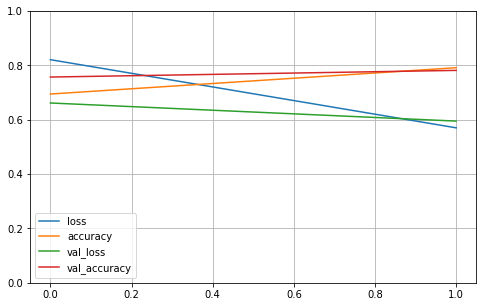

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [23]:
#will log metrics with the prefix 'test_'
with experiment.test():
    test_loss, test_accuracy = model4.evaluate(x_test, y_test)
    train_loss, train_accuracy = model4.evaluate(x_train, y_train)
    metrics = {
        'train_loss':train_loss,
        'train_accuracy':train_accuracy,
        'test_loss':test_loss,
        'test_accuracy':test_accuracy,
    }
    experiment.log_metrics(metrics)

experiment.log_dataset_hash(x_train) 

60000/60000 [==============================] - 2s 41us/sample - loss: 0.5549 - accuracy: 0.7983


In [63]:
experiment.log_model("FASHION MNIST modified vgg", "my_keras_model_newmodel.h5")

{'web': 'https://www.comet.ml/api/asset/download?assetId=4abb8a4354e64918b63d1793a2cb7d2d&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=4abb8a4354e64918b63d1793a2cb7d2d&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'assetId': '4abb8a4354e64918b63d1793a2cb7d2d'}

In [30]:
Y_pred = model4.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [32]:
Y_true = np.argmax(y_test,axis = 1) 

In [61]:
experiment.log_confusion_matrix(Y_true, Y_pred_classes , labels = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']) 

{'web': 'https://www.comet.ml/api/asset/download?assetId=b01b7f636c3542d59627849178e09261&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=b01b7f636c3542d59627849178e09261&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'assetId': 'b01b7f636c3542d59627849178e09261'}

## Correctly predicted

In [56]:
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

{'web': 'https://www.comet.ml/api/image/download?imageId=7ab86e94250747d5a5488923f378a583&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=7ab86e94250747d5a5488923f378a583&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'imageId': '7ab86e94250747d5a5488923f378a583'}

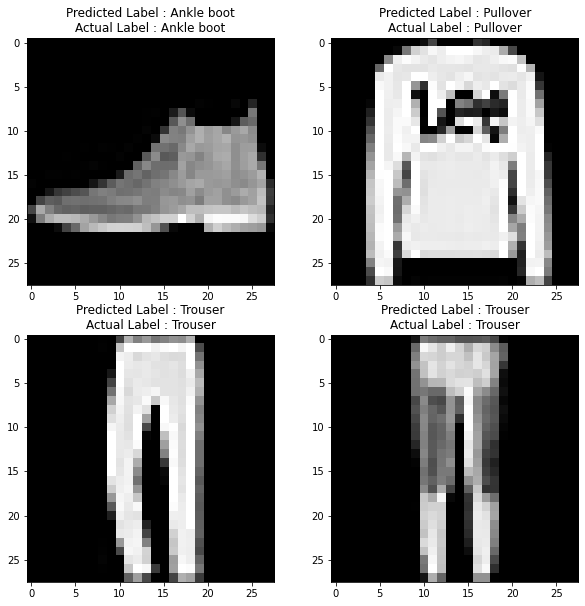

In [58]:
fig, ax = plt.subplots(2,2, figsize=(12,6))

fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[3]]]))
experiment.log_figure(figure_name = "Correctly Predicted Classes" ,figure =  fig)

In [59]:
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

{'web': 'https://www.comet.ml/api/image/download?imageId=eab0fa84d283473fa135c7039279aa27&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=eab0fa84d283473fa135c7039279aa27&experimentKey=f95b37e3d33f4fb2b081d51d7be85142',
 'imageId': 'eab0fa84d283473fa135c7039279aa27'}

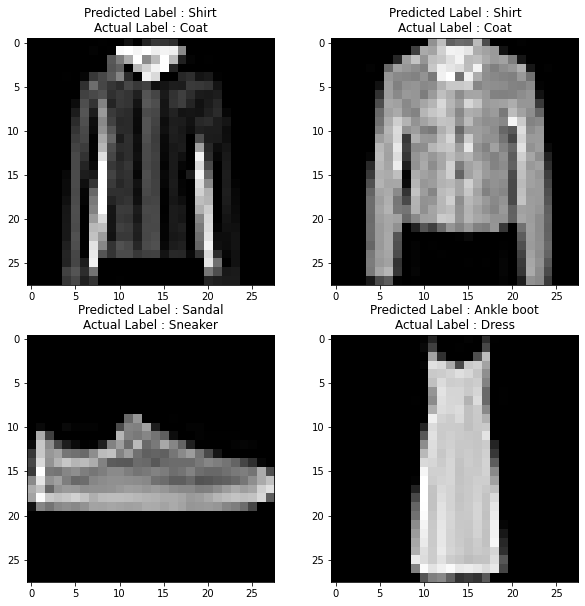

In [60]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[3]]]))
experiment.log_figure(figure_name = "Incorrectly Predicted Classes", figure = fig)